In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import AllocationFunctions

In [2]:
shadow = pd.read_excel('AAII.xlsx')
mine = pd.read_excel('PortfolioDownload.xlsx')

In [6]:
positive_contribution = 175 
negative_contribution = 0
stock_list = AllocationFunctions.merge_lists(shadow, mine)
print(stock_list['my_amounts'].sum())
print(stock_list['my_total_prices_paid'].sum())
stock_list = AllocationFunctions.get_weighting(stock_list)
stock_list = AllocationFunctions.optimize_by_difference(stock_list, positive_contribution, negative_contribution)

7739.200000000001
8547.80377


Text(0.5, 1.0, 'Number of shares to buy / sell ')

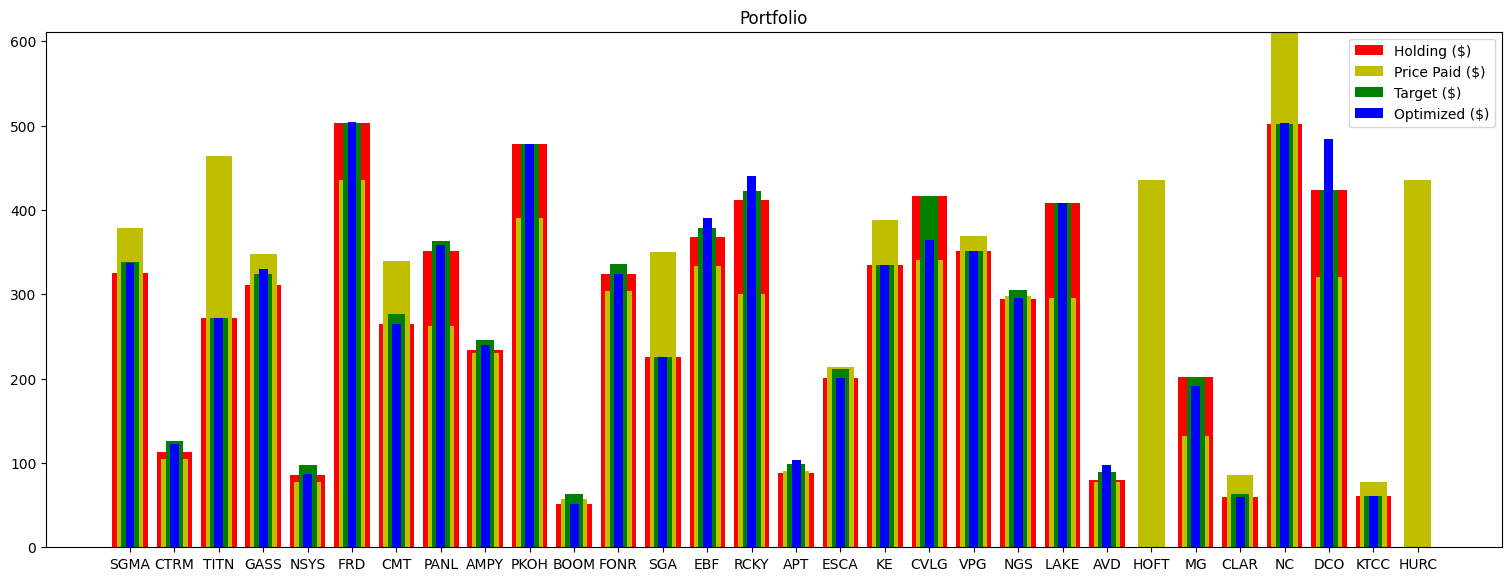

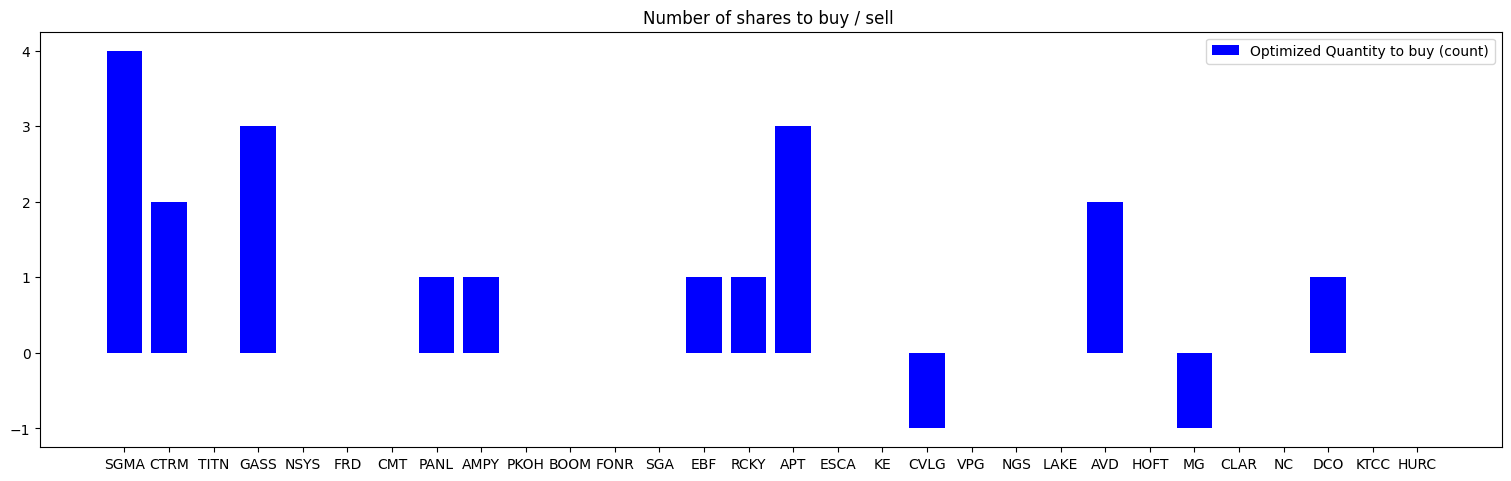

In [9]:
stock_indices = np.array(range(stock_list['num_stocks']))
width = 0.8
x_Holding = [i+0.5*width for i in stock_indices]
fig, ax = plt.subplots(figsize=(15, 5.7), layout='constrained')
ax.bar(x_Holding, stock_list['my_total_prices_paid'] , label='Price Paid ($)', color = 'r')
ax.bar(x_Holding, stock_list['my_amounts'],  width=0.75*width, label='Market Value ($)', color = 'g')
ax.bar(x_Holding, stock_list['target_amounts'] , width=0.50*width, label='Target ($)', color = 'g')
ax.bar(x_Holding, stock_list['optimized_amounts'], width=0.25*width, label='Optimized ($)', color = 'b')
plt.xticks(stock_indices+width/2, stock_list['tickers'])
ax.legend()
plt.title('Portfolio')
min_y = np.min([stock_list['my_amounts'], stock_list['target_amounts'], stock_list['optimized_amounts'], stock_list['my_total_prices_paid']])
max_y = np.max([stock_list['my_amounts'], stock_list['target_amounts'], stock_list['optimized_amounts'], stock_list['my_total_prices_paid']])
plt.ylim(min_y, max_y)

fig, ax = plt.subplots(figsize=(15, 4.7), layout='constrained')
ax.bar(x_Holding, stock_list['optimized_delta_quantities'],  label='Optimized Quantity to buy (count)', color = 'b')
plt.xticks(stock_indices+width/2, stock_list['tickers'])
ax.legend()
plt.title('Number of shares to buy / sell ')